# ARIMA FOR STOCK PRICE PREDICTION (TIME SERIES)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read Data from CSV file And Store It IN DATAFRAME
df = pd.read_csv('NSE-TATAGLOBAL.csv')

#print TOP 5 RECORD
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [3]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2.100000e+03,2100.000000
mean,151.818810,154.145190,149.361619,151.584762,151.561595,2.327641e+06,3919.237300
std,49.350352,50.127368,48.597083,49.420366,49.401844,2.081348e+06,4547.900775
min,81.100000,82.800000,80.000000,81.000000,80.950000,3.961000e+04,37.040000
25%,120.750000,122.675000,119.000000,120.600000,120.550000,1.147086e+06,1462.815000
50%,142.250000,144.300000,140.425000,142.000000,141.950000,1.768579e+06,2552.165000
75%,159.000000,161.500000,156.825000,158.712500,158.762500,2.795726e+06,4548.082500
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [4]:
# Data Frame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2100 non-null   object 
 1   Open                  2100 non-null   float64
 2   High                  2100 non-null   float64
 3   Low                   2100 non-null   float64
 4   Last                  2100 non-null   float64
 5   Close                 2100 non-null   float64
 6   Total Trade Quantity  2100 non-null   float64
 7   Turnover (Lacs)       2100 non-null   float64
dtypes: float64(7), object(1)
memory usage: 131.4+ KB


In [5]:
# DATA CLEANING 
# CHECK ANY NULL VALUE IS PRESENT OR NOT
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
# CHECK ANY VALUE IS MISSING OR NOT
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
# Convert Date Column data type Object to Year-Month-day
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')

#setting index as date
df.index = df['Date']

df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2019-01-04,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
2019-01-03,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2019-01-02,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
2019-01-01,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
2018-12-31,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [8]:
# SORT DATA FRAME BY INDEX ASENDING ORDER
df = df.sort_index()

print('AFTER SORTING BY DATE(INDEX) ASC ORDER')
df.head()

AFTER SORTING BY DATE(INDEX) ASC ORDER


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [9]:
new_data = pd.DataFrame(index=df.index)
new_data['Close'] = df['Close']

new_data.head()

,Close
Date,
2010-07-21,121.55
2010-07-22,120.90
2010-07-23,120.65
2010-07-26,117.60
2010-07-27,118.65


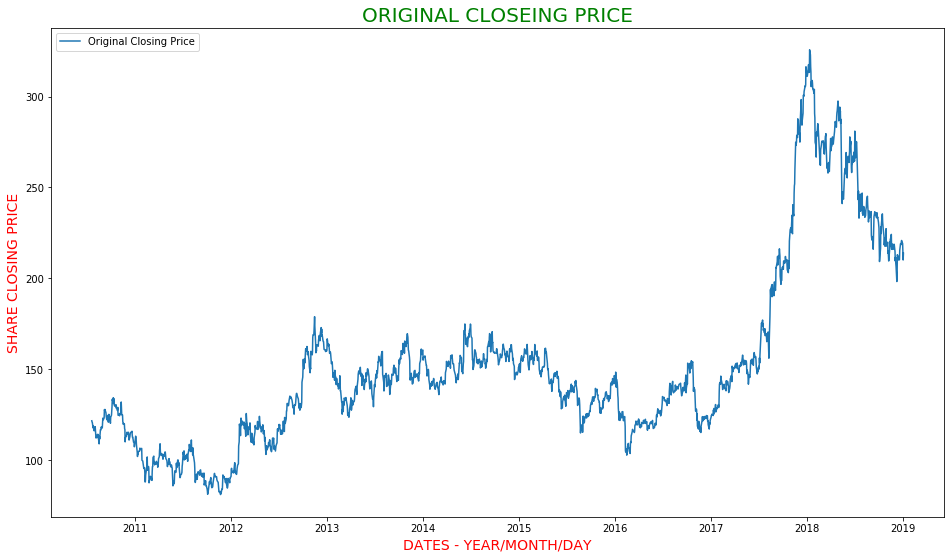

In [10]:
from pandas.plotting import register_matplotlib_converters

pd.plotting.register_matplotlib_converters()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(new_data['Close'], label='Original Closing Price')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('ORIGINAL CLOSEING PRICE', fontsize=20, color='g')
ax.legend()

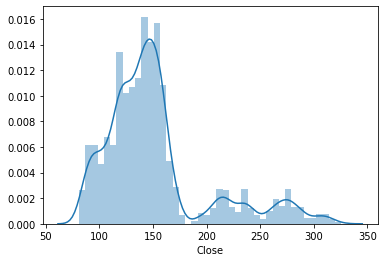

In [11]:
sns.distplot( new_data["Close"] )

# CHECKING STATIONARY USING MEAN AND VARIENCE

In [12]:
X = new_data['Close'].values

split = round(len(X) / 2)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

print('BOTH MEANS AND BOTH VARIENCE DOES NOT HAVE SAME VALUE SO IT IS NON STATIONARY DATA')

mean1=128.053810, mean2=175.069381
variance1=625.203685, variance2=3148.324460
BOTH MEANS AND BOTH VARIENCE DOES NOT HAVE SAME VALUE SO IT IS NON STATIONARY DATA


# CHECKING STATIONARY USING ROLLING STATISTICS

In [13]:
# determining ROLLING STATISTICS

rollingmean = new_data['Close'].rolling(window=30).mean()

rollingstd = new_data['Close'].rolling(window=30).std()

#print(rollingmean, rollingstd)

MEAN AND STANDARD DEVIATION IS NOT CONSTANT SO DATA IS NOT STATIONARY


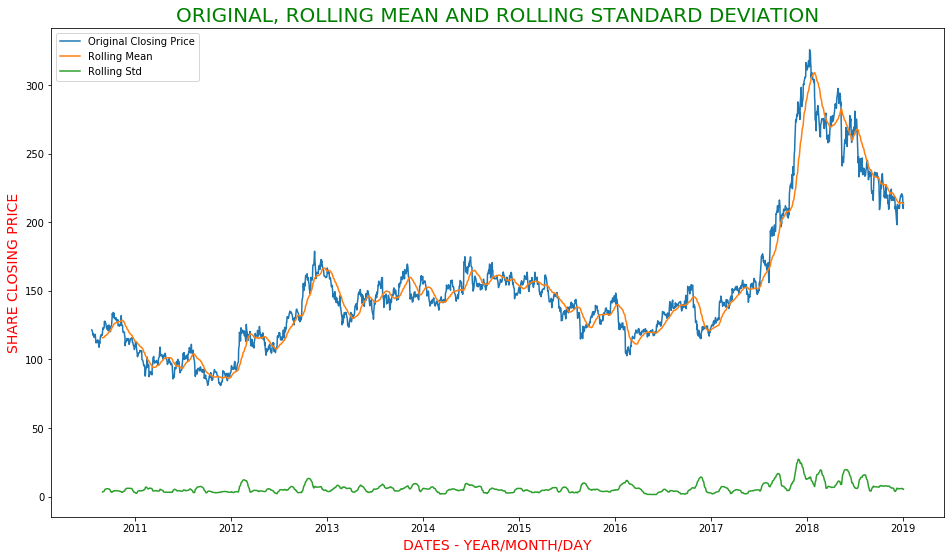

In [14]:
from pandas.plotting import register_matplotlib_converters

pd.plotting.register_matplotlib_converters()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(new_data['Close'], label='Original Closing Price')
ax.plot(rollingmean, label='Rolling Mean')
ax.plot(rollingstd, label='Rolling Std ')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('ORIGINAL, ROLLING MEAN AND ROLLING STANDARD DEVIATION', fontsize=20, color='g')
ax.legend()

print('MEAN AND STANDARD DEVIATION IS NOT CONSTANT SO DATA IS NOT STATIONARY')

# CHECKING STATIONARY USING AUGMENTED DICKEY-FULLER TEST (UNIT ROOT TEST)

In [15]:
# PERFORM DICKEY-FULLER TEST
from statsmodels.tsa.stattools import adfuller

print('RESULT OF DICKEY-FULLER TEST')
# AIC - Akaike Information Criterion 
# Akaike Information Critera (AIC) is a widely used measure of a statistical model. 
# It basically quantifies 1) the goodness of fit and 2) the simplicity/parsimony of the model into a single statistic.
dftest = adfuller(new_data['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statictics','p-value','lags Used', 'No Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

RESULT OF DICKEY-FULLER TEST
Test Statictics           -1.129517
p-value                    0.703158
lags Used                 16.000000
No Observations Used    2083.000000
Critical Value (1%)       -3.433493
Critical Value (5%)       -2.862929
Critical Value (10%)      -2.567509
dtype: float64


Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

# DATA IS NOT STATIONARY BECAUSE IT DOES NOT FOLLOW THE RULE OF NULL HYPOTHISIS

In [16]:
#Estimated trend

new_data_logscale = np.log(new_data)

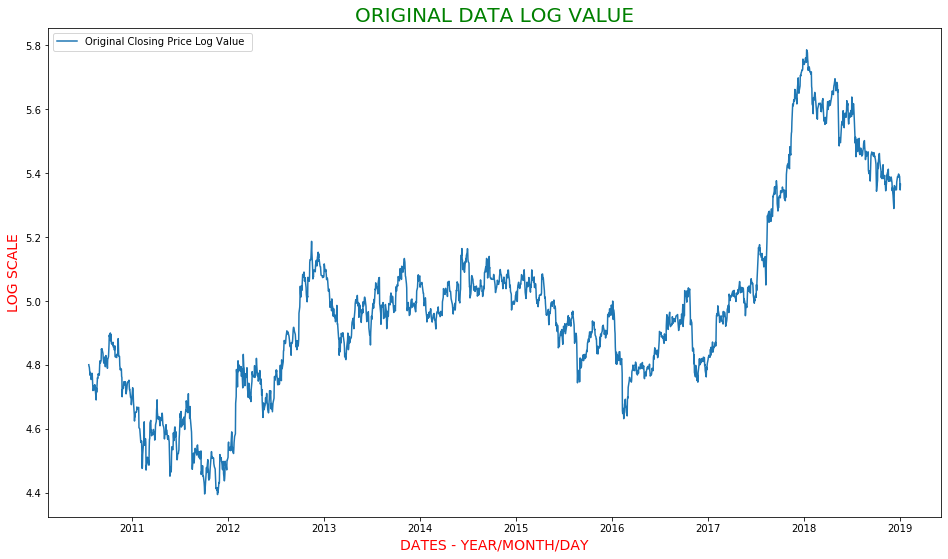

In [17]:
from pandas.plotting import register_matplotlib_converters

pd.plotting.register_matplotlib_converters()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(new_data_logscale, label='Original Closing Price Log Value ')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('LOG SCALE',fontsize=14, color='r')
ax.set_title('ORIGINAL DATA LOG VALUE', fontsize=20, color='g')
ax.legend()

# CHECKING STATIONARY USING MEAN AND VARIENCE USING LOG VALUE

In [18]:
X = new_data_logscale['Close'].values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

print('NOW BOTH MEANS AND BOTH VARIENCE VALUE ARE NEARER TO EACH OTHER So IT IS LIKE STATIONARY DATA')

mean1=4.832385, mean2=5.119293
variance1=0.041257, variance2=0.086889
NOW BOTH MEANS AND BOTH VARIENCE VALUE ARE NEARER TO EACH OTHER So IT IS LIKE STATIONARY DATA


# Determining Moving Average USING LOG VALUE

In [19]:
# determining MOVING AVERAGE USING LOG VALUE

movingaverage = new_data_logscale['Close'].rolling(window=30).mean()

movingstd = new_data_logscale['Close'].rolling(window=30).std()

#print(movingaverage, movingstd)

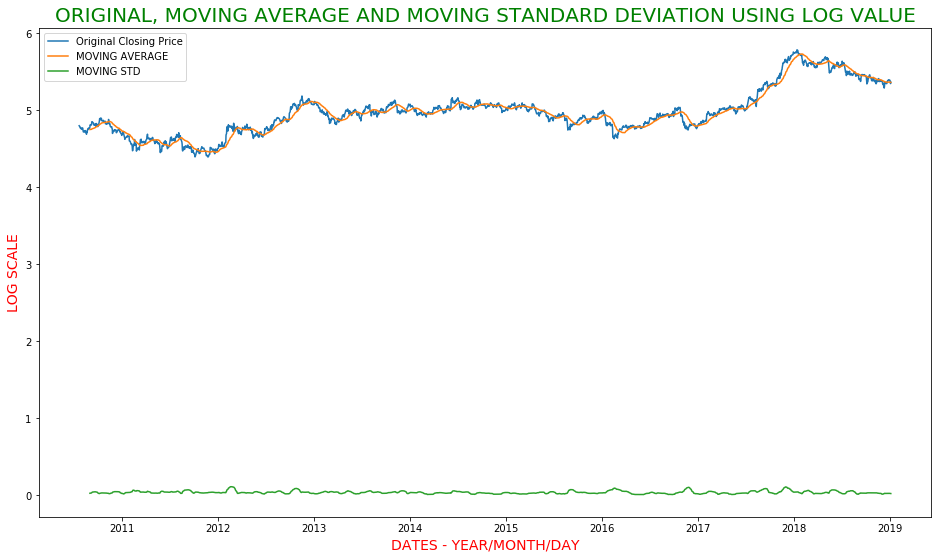

In [20]:
from pandas.plotting import register_matplotlib_converters

pd.plotting.register_matplotlib_converters()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(new_data_logscale['Close'], label='Original Closing Price')
ax.plot(movingaverage, label='MOVING AVERAGE')
ax.plot(movingstd, label='MOVING STD ')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('LOG SCALE',fontsize=14, color='r')
ax.set_title('ORIGINAL, MOVING AVERAGE AND MOVING STANDARD DEVIATION USING LOG VALUE', fontsize=20, color='g')
ax.legend()

In [21]:
# PERFORM DICKEY-FULLER TEST
from statsmodels.tsa.stattools import adfuller

print('RESULT OF DICKEY-FULLER TEST')
# Akaike Information Critera (AIC) is a widely used measure of a statistical model. 
# It basically quantifies 1) the goodness of fit and 2) the simplicity/parsimony of the model into a single statistic.
dftest = adfuller(new_data_logscale['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statictics','p-value','lags Used', 'No Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

RESULT OF DICKEY-FULLER TEST
Test Statictics           -1.393746
p-value                    0.585271
lags Used                  0.000000
No Observations Used    2099.000000
Critical Value (1%)       -3.433469
Critical Value (5%)       -2.862918
Critical Value (10%)      -2.567504
dtype: float64


In [22]:
# PERIOD IS 1 (2nd value - 1st Value) i.e. 146 - 266 = 120 like this
#INTEGRATED OF ORDER 1, denoted by d(difference) ARIMA MODEL
price_diff = new_data_logscale.diff(periods=1)

price_diff.head()

,Close
Date,
2010-07-21,NaN
2010-07-22,-0.005362
2010-07-23,-0.002070
2010-07-26,-0.025605
2010-07-27,0.008889


In [23]:
#REMOVING NAN

price_diff = price_diff[1:] 
price_diff.head()

,Close
Date,
2010-07-22,-0.005362
2010-07-23,-0.002070
2010-07-26,-0.025605
2010-07-27,0.008889
2010-07-28,-0.003377


# CHECKING STATIONARITY

In [24]:
# PERFORM DICKEY-FULLER TEST
from statsmodels.tsa.stattools import adfuller

print('RESULT OF DICKEY-FULLER TEST')
# AIC - Akaike Information Criterion 
dftest = adfuller(price_diff['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statictics','p-value','lags Used', 'No Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

RESULT OF DICKEY-FULLER TEST
Test Statictics          -19.853521
p-value                    0.000000
lags Used                  5.000000
No Observations Used    2093.000000
Critical Value (1%)       -3.433478
Critical Value (5%)       -2.862922
Critical Value (10%)      -2.567506
dtype: float64


## DATA IS STATIONARY P VALUE IS 0.0000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


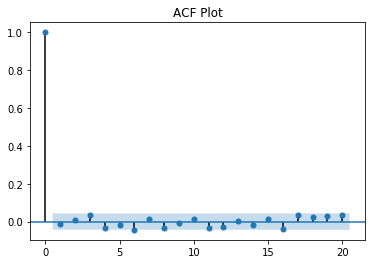

In [25]:
# CHECKING STATIONARITY USING ACF(AutoCorrelation Function) PLOT
from statsmodels.graphics.tsaplots import plot_acf

acf = plot_acf(price_diff, lags = 20)
plt.title("ACF Plot")
acf.show()

#price_diff1 = price_diff[:40]
#plot_acf(price_diff1)


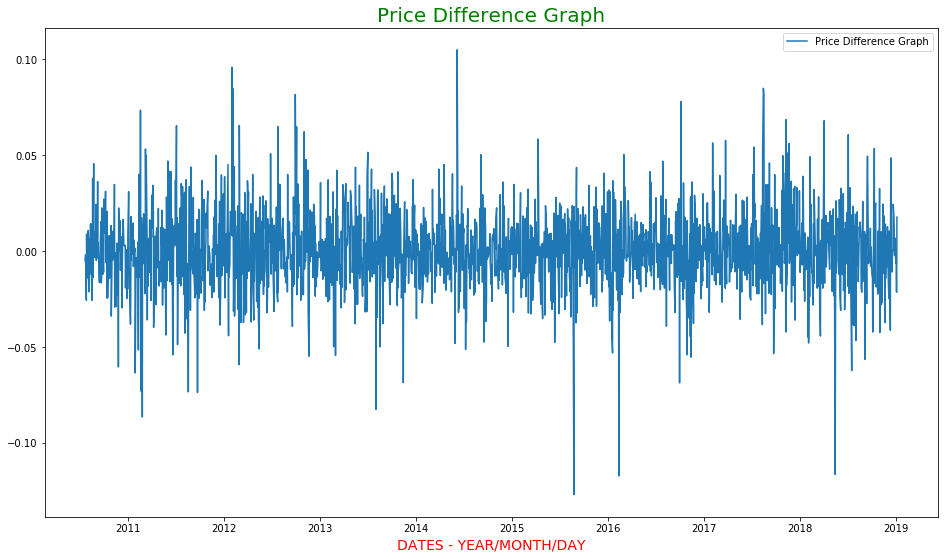

<Figure size 1152x576 with 0 Axes>

In [26]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

plt.figure(figsize=(16,8))
ax.plot(price_diff,label='Price Difference Graph')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_title('Price Difference Graph', fontsize=20, color='g')
ax.legend()

(-0.1, 0.1)

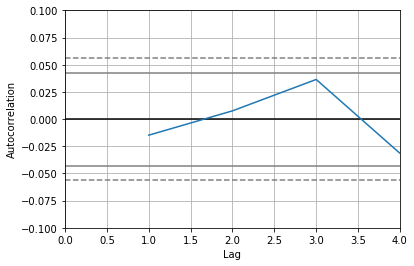

In [27]:
from pandas.plotting import autocorrelation_plot

#Auto Correlation Plot
ax = autocorrelation_plot(price_diff)
ax.set_xlim([0, 4])
ax.set_ylim([-0.1, +0.1])

# CREATE TRAIN AND TEST DATA FOR 15 DAYS PREDICTION

In [28]:
totalrowno = len(price_diff)
#print(totalrowno)

X = price_diff.values

# Split the data into training/testing sets
train = X[:(totalrowno-15)] 
test = X[(totalrowno-15):] 

print('X SHAPE ', X.shape)
print('TRAIN SHAPE ', train.shape)
print('TEST SHAPE ', test.shape)

X SHAPE  (2099, 1)
TRAIN SHAPE  (2084, 1)
TEST SHAPE  (15, 1)


# CREATE MODEL FOR 15 DAYS PREDICTION

In [29]:
from statsmodels.tsa.arima_model import ARIMA

#p,d,q  
#p -> periods taken for autoregressive model
#d -> Integrated order, difference
# q -> periods in moving average model
# order=(p, d, q)
# IF p is 1 IT will consider only previous month value
# IF p is 2 IT will consider only past two months value
# d is 1 means it will calculate difference only 1 by shifted down
# d is 2 means it will repeat 2 times
# Moving Average is 0
model_arima = ARIMA(train,order=(3, 1, 0))

model_arima_fit = model_arima.fit()

# Akaike Information Critera (AIC) is a widely used measure of a statistical model. 
# It basically quantifies 1) the goodness of fit and 2) the simplicity/parsimony of the model into a single statistic.
#When comparing two models, the one with the lower AIC is generally “better”. 

print(model_arima_fit.aic)

-9801.771767581464


# 15 DAYS PREDICTION

In [30]:
#PREDICT PRICE
stcokclose_preds = model_arima_fit.forecast(steps=15)[0]

print(stcokclose_preds)

[0.01027911 0.0209007  0.01714045 0.01193622 0.01561578 0.01624532
 0.01503254 0.01489006 0.01550719 0.01538917 0.01522463 0.01530644
 0.01537879 0.01534348 0.01534341]


# ERROR CLACULATION

In [31]:
#calculate rmse
#MSE (Mean Squared Error) = np.mean((y_test - y_predtest)**2)
#RMSE (Root Mean Squared Error) = np.sqrt(MSE)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test,stcokclose_preds)
rmse = np.sqrt(mse)
rmse

0.019615561383474832

In [32]:
#test
'''
l =[]
for x in test:
    l.append(float("%.6f"%x[0]))
l
'''

test_list =[float("%.6f"%x[0]) for x in test]
#test_list

In [33]:
df2 = pd.DataFrame(zip(test_list,stcokclose_preds),columns=['Test Close','Predict Close'])
df2

,Test Close,Predict Close
0,-0.000235,0.010279
1,-0.010890,0.020901
2,0.000238,0.017140
3,0.000238,0.011936
4,0.000238,0.015616
5,0.024437,0.016245
6,0.016803,0.015033
7,-0.002285,0.014890
8,0.006840,0.015507
9,0.003403,0.015389


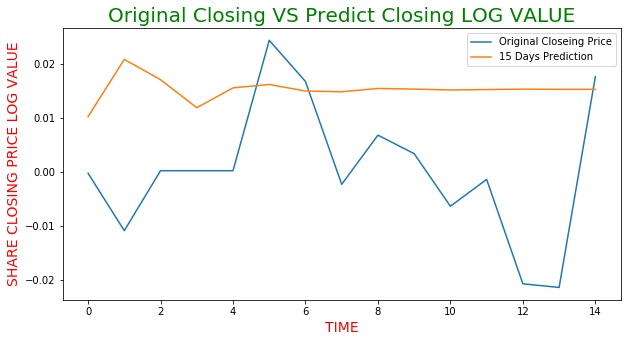

In [34]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df2['Original Close'], label='Original Closeing Price')
ax.plot(df2['Predict Close'], label='15 Days Prediction')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE LOG VALUE',fontsize=14, color='r')
ax.set_title('Original Closing VS Predict Closing LOG VALUE', fontsize=20, color='g')
ax.legend()

# CREATE TRAIN AND TEST DATA FOR 45 DAYS PREDICTION

In [35]:
totalrowno = len(price_diff)
#print(totalrowno)

X = price_diff.values

# Split the data into training/testing sets
train = X[:(totalrowno-45)] 
test = X[(totalrowno-45):] 

print('X SHAPE ', X.shape)
print('TRAIN SHAPE ', train.shape)
print('TEST SHAPE ', test.shape)

X SHAPE  (2099, 1)
TRAIN SHAPE  (2054, 1)
TEST SHAPE  (45, 1)


# CREATE MODEL FOR 45 DAYS PREDICTION

In [36]:
from statsmodels.tsa.arima_model import ARIMA

#p,d,q  
#p -> periods taken for autoregressive model
#d -> Integrated order, difference
# q -> periods in moving average model
# order=(p, d, q)
# IF p is 1 IT will consider only previous month value
# IF p is 2 IT will consider only past two months value
# d is 1 means it will calculate difference only 1 by shifted down
# d is 2 means it will repeat 2 times
# Moving Average is 0
model_arima = ARIMA(train,order=(3, 1, 0))

model_arima_fit = model_arima.fit()

# Akaike Information Critera (AIC) is a widely used measure of a statistical model. 
# It basically quantifies 1) the goodness of fit and 2) the simplicity/parsimony of the model into a single statistic.
#When comparing two models, the one with the lower AIC is generally “better”. 

print(model_arima_fit.aic)

-9662.243476320118


# 45 DAYS PREDICTION

In [37]:
#PREDICT PRICE
stcokclose_preds = model_arima_fit.forecast(steps=45)[0]

print(stcokclose_preds)

[0.00667226 0.00912562 0.0157953  0.01491538 0.0117417  0.01324662
 0.01389881 0.01333119 0.01314748 0.01346232 0.01345705 0.01336592
 0.01339727 0.01344501 0.01343651 0.01343723 0.01345575 0.01346777
 0.01347388 0.01348406 0.01349545 0.01350511 0.01351463 0.01352488
 0.013535   0.01354488 0.01355486 0.01356491 0.01357491 0.01358489
 0.0135949  0.0136049  0.0136149  0.0136249  0.0136349  0.0136449
 0.0136549  0.0136649  0.0136749  0.0136849  0.0136949  0.0137049
 0.0137149  0.0137249  0.0137349 ]


# ERROR CLACULATION

In [38]:
#calculate rmse
#MSE (Mean Squared Error) = np.mean((y_test - y_predtest)**2)
#RMSE (Root Mean Squared Error) = np.sqrt(MSE)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test,stcokclose_preds)
rmse = np.sqrt(mse)
rmse

0.02341860586188934

In [39]:
test_list =[float("%.6f"%x[0]) for x in test]

In [40]:
df2 = pd.DataFrame(zip(test_list,stcokclose_preds),columns=['Original Close','Predict Close'])
df2

,Original Close,Predict Close
0,-0.042464,0.006672
1,-0.000459,0.009126
2,-0.000459,0.015795
3,0.010057,0.014915
4,-0.027904,0.011742
5,0.006527,0.013247
6,-0.026844,0.013899
7,0.024518,0.013331
8,0.024159,0.013147
9,-0.011661,0.013462


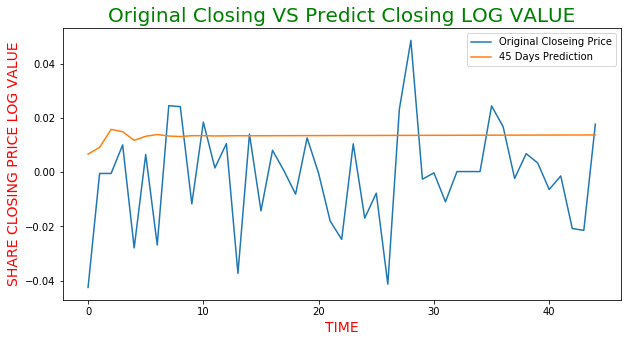

In [41]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df2['Original Close'], label='Original Closeing Price')
ax.plot(df2['Predict Close'], label='45 Days Prediction')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE LOG VALUE',fontsize=14, color='r')
ax.set_title('Original Closing VS Predict Closing LOG VALUE', fontsize=20, color='g')
ax.legend()

# CREATE TRAIN AND TEST DATA FOR 90 DAYS PREDICTION

In [42]:
totalrowno = len(price_diff)
#print(totalrowno)

X = price_diff.values

# Split the data into training/testing sets
train = X[:(totalrowno-90)] 
test = X[(totalrowno-90):] 

print('X SHAPE ', X.shape)
print('TRAIN SHAPE ', train.shape)
print('TEST SHAPE ', test.shape)

X SHAPE  (2099, 1)
TRAIN SHAPE  (2009, 1)
TEST SHAPE  (90, 1)


# CREATE MODEL FOR 90 DAYS PREDICTION

In [43]:
from statsmodels.tsa.arima_model import ARIMA

#p,d,q  
#p -> periods taken for autoregressive model
#d -> Integrated order, difference
# q -> periods in moving average model
# order=(p, d, q)
# IF p is 1 IT will consider only previous month value
# IF p is 2 IT will consider only past two months value
# d is 1 means it will calculate difference only 1 by shifted down
# d is 2 means it will repeat 2 times
# Moving Average is 0
model_arima = ARIMA(train,order=(3, 1, 0))

model_arima_fit = model_arima.fit()

# Akaike Information Critera (AIC) is a widely used measure of a statistical model. 
# It basically quantifies 1) the goodness of fit and 2) the simplicity/parsimony of the model into a single statistic.
#When comparing two models, the one with the lower AIC is generally “better”. 

print(model_arima_fit.aic)

-9460.893612787779


# 90 DAYS PREDICTION

In [44]:
#PREDICT PRICE
stcokclose_preds = model_arima_fit.forecast(steps=90)[0]

print(stcokclose_preds)

[ 0.0041382   0.00173163 -0.0022999  -0.00279929  0.00014787 -0.00102252
 -0.00150267 -0.00114809 -0.00092491 -0.00116917 -0.00116059 -0.00108239
 -0.00108832 -0.00111767 -0.00110079 -0.00109009 -0.00109318 -0.00109218
 -0.00108603 -0.00108305 -0.00108109 -0.00107781 -0.00107437 -0.00107151
 -0.00106856 -0.00106542 -0.00106235 -0.00105934 -0.00105629 -0.00105323
 -0.00105018 -0.00104714 -0.00104409 -0.00104104 -0.00103799 -0.00103494
 -0.00103189 -0.00102884 -0.00102579 -0.00102274 -0.00101969 -0.00101664
 -0.00101359 -0.00101055 -0.0010075  -0.00100445 -0.0010014  -0.00099835
 -0.0009953  -0.00099225 -0.0009892  -0.00098615 -0.0009831  -0.00098005
 -0.000977   -0.00097395 -0.00097091 -0.00096786 -0.00096481 -0.00096176
 -0.00095871 -0.00095566 -0.00095261 -0.00094956 -0.00094651 -0.00094346
 -0.00094041 -0.00093736 -0.00093431 -0.00093126 -0.00092822 -0.00092517
 -0.00092212 -0.00091907 -0.00091602 -0.00091297 -0.00090992 -0.00090687
 -0.00090382 -0.00090077 -0.00089772 -0.00089467 -0

# ERROR CLACULATION

In [45]:
#calculate rmse
#MSE (Mean Squared Error) = np.mean((y_test - y_predtest)**2)
#RMSE (Root Mean Squared Error) = np.sqrt(MSE)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test,stcokclose_preds)
rmse = np.sqrt(mse)
rmse

0.02049308853558614

In [46]:
test_list =[float("%.6f"%x[0]) for x in test]

In [47]:
df2 = pd.DataFrame(zip(test_list,stcokclose_preds),columns=['Original Close','Predict Close'])
df2[:10]

,Original Close,Predict Close
0,-0.021429,0.004138
1,-0.019081,0.001732
2,0.025853,-0.002300
3,-0.015732,-0.002799
4,0.005129,0.000148
5,0.006163,-0.001023
6,-0.007229,-0.001503
7,0.010191,-0.001148
8,-0.056488,-0.000925
9,-0.005828,-0.001169


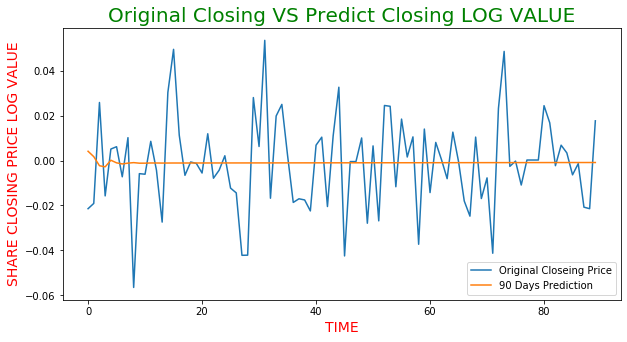

In [48]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df2['Original Close'], label='Original Closeing Price')
ax.plot(df2['Predict Close'], label='90 Days Prediction')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE LOG VALUE',fontsize=14, color='r')
ax.set_title('Original Closing VS Predict Closing LOG VALUE', fontsize=20, color='g')
ax.legend()